In [3]:
from lgdo.lh5 import LH5Store, ls, show, load_dfs

from dspeed.vis import WaveformBrowser
from dspeed import units
from dspeed import build_dsp
import numpy as np
import pandas as pd


from scipy import stats


import matplotlib.pyplot as plt
import os , json


import pint
u = pint.get_application_registry()


import os

plt.rcParams["figure.figsize"] = (14, 4)
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = 12


import legendstyles

plt.style.use(legendstyles.LEGEND)



In [4]:

#Note, this just means data file entry for the simulation results you get from the other preprocessing file


df_summary_6_40 = pd.read_pickle("df_summary_6_p08_active_cut40.pkl")
df_summary_10_40 = pd.read_pickle("df_summary_10_p08_active_cut40.pkl")
df_summary_15_40 = pd.read_pickle("df_summary_15_p08_active_cut40.pkl")
df_summary_20_40 = pd.read_pickle("df_summary_20_p08_active_cut40.pkl")
df_summary_30_40 = pd.read_pickle("df_summary_30_p08_active_cut40.pkl")
df_summary_40_40 = pd.read_pickle("df_summary_40_p08_active_cut40.pkl")
df_summary_50_40 = pd.read_pickle("df_summary_50_p08_active_cut40.pkl")
df_summary_60_40 = pd.read_pickle("df_summary_60_p08_active_cut40.pkl")
df_summary_70_40 = pd.read_pickle("df_summary_70_p08_active_cut40.pkl")




In [8]:
import numpy as np
import pandas as pd

# List of all files and they labels they receive, 
#For me I chose the cut (40keV) and the fraction (6,10,15 ect.) as the labels
files_dict = {
    "6_40": "df_summary_6_p08_active_cut40.pkl",
    "10_40": "df_summary_10_p08_active_cut40.pkl",
    "15_40": "df_summary_15_p08_active_cut40.pkl",
    "20_40": "df_summary_20_p08_active_cut40.pkl",
    "30_40": "df_summary_30_p08_active_cut40.pkl",
    "40_40": "df_summary_40_p08_active_cut40.pkl",
    "50_40": "df_summary_50_p08_active_cut40.pkl",
    "60_40": "df_summary_60_p08_active_cut40.pkl",
    "70_40": "df_summary_70_p08_active_cut40.pkl",
}

# Create 100 bins for theta and phi
theta_bins = np.linspace(0, np.pi, 100)
phi_bins = np.linspace(-np.pi, np.pi, 100)

# Function to calculate solid angle function to calcualte solid angle for each bin
def solid_angle_bin_area(theta_low, theta_high, phi_low, phi_high):
    return (phi_high - phi_low) * (np.cos(theta_low) - np.cos(theta_high))

# Precompute bin areas for all bins
bin_areas = {}
for i in range(len(theta_bins) - 1):
    for j in range(len(phi_bins) - 1):
        key = (i, j)
        bin_areas[key] = solid_angle_bin_area(
            theta_bins[i], theta_bins[i + 1],
            phi_bins[j], phi_bins[j + 1]
        )

# Empty Results
solid_angle_results = {}

# Loop over all files
for label, filename in files_dict.items():
    # Load file
    df_summary = pd.read_pickle(filename)
    
    #Take first hit per particle
    first_hits = (
        df_summary
        .sort_values("entry_time")
        .groupby("evtid")
        .first()
        .reset_index()
    )
    
    #Assign bins for theta and phi
    first_hits["theta_bin"] = np.digitize(first_hits["theta"], theta_bins) - 1
    first_hits["phi_bin"] = np.digitize(first_hits["phi"], phi_bins) - 1
    
    #Calculate total solid angle covered for each multiplicity
    solid_angle_by_mult = {}
    for mult, group in first_hits.groupby("multiplicity"):
        occupied_bins = set(zip(group["theta_bin"], group["phi_bin"]))
        solid_angle = sum(bin_areas[b] for b in occupied_bins if b in bin_areas)
        solid_angle_by_mult[mult] = solid_angle
    
    #Convert to a dataframe
    solid_angle_df = pd.DataFrame({
        "multiplicity": list(solid_angle_by_mult.keys()),
        "solid_angle_sr": list(solid_angle_by_mult.values())
    }).sort_values("multiplicity")
    
    globals()[f"solid_angle_df_{label}"] = solid_angle_df
    
    
    # Print summary
    print(f"{label}:")
    print(solid_angle_df)
    print("\n")


6_40:
    multiplicity  solid_angle_sr
0              1        3.361793
1              2        3.147763
2              3        2.555713
3              4        1.484772
4              5        0.483733
5              6        0.144788
6              7        0.037970
7              8        0.010490
8              9        0.005939
9             10        0.003760
10            12        0.000412


10_40:
    multiplicity  solid_angle_sr
0              1        3.352430
1              2        3.125145
2              3        2.518519
3              4        1.400182
4              5        0.421348
5              6        0.119479
6              7        0.038749
7              8        0.012994
8              9        0.003126
9             10        0.001108
10            11        0.000350
11            12        0.001173
12            13        0.000350


15_40:
    multiplicity  solid_angle_sr
0              1        3.360000
1              2        3.080085
2              3   

/tmp/ipykernel_2434893/393685409.py:66: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


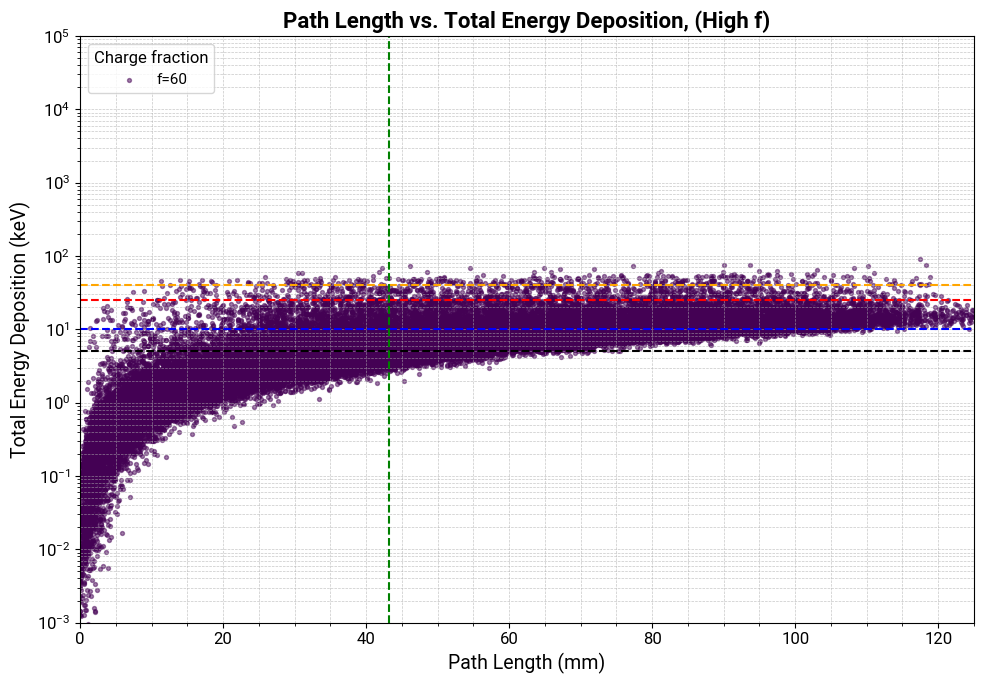

In [9]:
#Loads raw data files, so no energy cuts applied

df_summary_6_raw = pd.read_pickle("Summer Analysis/df_summary_6_raw.pkl")
df_summary_10_raw = pd.read_pickle("Summer Analysis/df_summary_10_raw.pkl")
df_summary_15_raw = pd.read_pickle("Summer Analysis/df_summary_15_raw.pkl")
df_summary_20_raw = pd.read_pickle("Summer Analysis/df_summary_20_raw.pkl")
df_summary_25_raw = pd.read_pickle("Summer Analysis/df_summary_25_raw.pkl")
df_summary_30_raw = pd.read_pickle("Summer Analysis/df_summary_30_raw.pkl")
df_summary_35_raw = pd.read_pickle("Summer Analysis/df_summary_35_raw.pkl")
df_summary_40_raw = pd.read_pickle("Summer Analysis/df_summary_40_raw.pkl")
df_summary_45_raw = pd.read_pickle("Summer Analysis/df_summary_45_raw.pkl")
df_summary_50_raw = pd.read_pickle("Summer Analysis/df_summary_50_raw.pkl")
df_summary_55_raw = pd.read_pickle("Summer Analysis/df_summary_55_raw.pkl")
df_summary_60_raw = pd.read_pickle("Summer Analysis/df_summary_60_raw.pkl")
df_summary_70_raw = pd.read_pickle("Summer Analysis/df_summary_70_raw.pkl")





import matplotlib.pyplot as plt


# Create figure
plt.figure(figsize=(10, 7))
plt.minorticks_on()

# Define colormap for consistency across f-values
colors = plt.cm.viridis(np.linspace(0, 1, 9))
f_values = [60]
df_summaries = [ df_summary_60_raw
]

# Plot each f-value group
for df, f, color in zip(df_summaries, f_values, colors):
    plt.scatter(df["path_length"], df["total_edep"], s=8, alpha=0.5, label=f"f={f}", color=color)

# Axis labels and formatting
plt.xlabel("Path Length (mm)", fontsize=14)
plt.ylabel("Total Energy Deposition (keV)", fontsize=14)
plt.title("Path Length vs. Total Energy Deposition, (High f)", fontsize=16, weight='bold')

plt.yscale("log")
plt.xlim(0, 125)
plt.ylim(1e-3, 1e5)

# Tick formatting
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.axhline(y=40, color='orange', linestyle='--', linewidth=1.5)
plt.axhline(y=25, color='red', linestyle='--', linewidth=1.5)
plt.axhline(y=10, color='blue', linestyle='--', linewidth=1.5)
plt.axhline(y=5, color='black', linestyle='--', linewidth=1.5)


plt.axvline(x=43.2, color='green', linestyle='--', linewidth=1.5)




# Grid and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title="Charge fraction", fontsize=11, title_fontsize=12, loc="upper left", frameon=True)

plt.tight_layout()
plt.show()


/tmp/ipykernel_2434893/2468022005.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


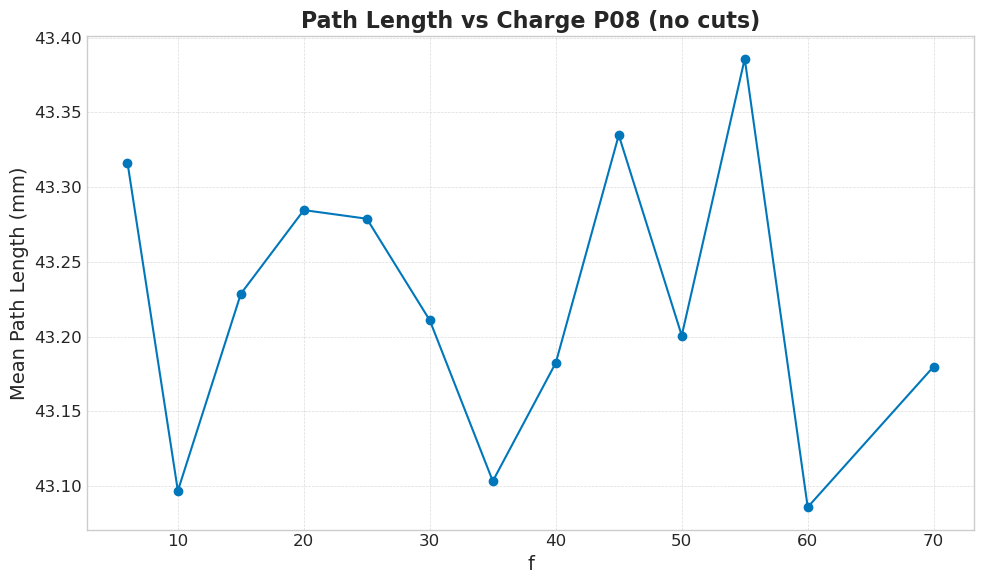

In [10]:
f = [6, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 70]

mean_pl_6 = df_summary_6_raw["path_length"].mean()

mean_pl_10 = df_summary_10_raw["path_length"].mean()

mean_pl_15 = df_summary_15_raw["path_length"].mean()

mean_pl_20 = df_summary_20_raw["path_length"].mean()

mean_pl_25 = df_summary_25_raw["path_length"].mean()

mean_pl_30 = df_summary_30_raw["path_length"].mean()

mean_pl_35 = df_summary_35_raw["path_length"].mean()

mean_pl_40 = df_summary_40_raw["path_length"].mean()

mean_pl_45 = df_summary_45_raw["path_length"].mean()

mean_pl_50 = df_summary_50_raw["path_length"].mean()

mean_pl_55 = df_summary_55_raw["path_length"].mean()

mean_pl_60 = df_summary_60_raw["path_length"].mean()

mean_pl_70 = df_summary_70_raw["path_length"].mean()

mean_path_length = [mean_pl_6, mean_pl_10,  mean_pl_15, mean_pl_20, mean_pl_25, mean_pl_30, mean_pl_35, mean_pl_40, mean_pl_45,
                   mean_pl_50, mean_pl_55, mean_pl_60, mean_pl_70]


plt.figure(figsize=(10, 6))
plt.style.use("seaborn-v0_8-whitegrid")

plt.plot(f, mean_path_length, marker='o')


# Axis Labels and Title
plt.xlabel("f", fontsize=14)
plt.ylabel("Mean Path Length (mm)", fontsize=14)
plt.title("Path Length vs Charge P08 (no cuts)", fontsize=16, weight='bold')



# Legend and Grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()



In [11]:
#All the area areas we created from the post processing file

mean_area_6_40 = pd.read_pickle("area_6_p08_active_40.pkl")
mean_area_10_40 = pd.read_pickle("area_10_p08_active_40.pkl")
mean_area_15_40 = pd.read_pickle("area_15_p08_active_40.pkl")
mean_area_20_40 = pd.read_pickle("area_20_p08_active_40.pkl")
mean_area_30_40 = pd.read_pickle("area_30_p08_active_40.pkl")
mean_area_40_40 = pd.read_pickle("area_40_p08_active_40.pkl")
mean_area_50_40 = pd.read_pickle("area_50_p08_active_40.pkl")
mean_area_60_40 = pd.read_pickle("area_60_p08_active_40.pkl")
mean_area_70_40 = pd.read_pickle("area_70_p08_active_40.pkl")

print(mean_area_40_40)

multiplicity
1    50.517055
2    45.657360
3    42.566667
4    41.792011
5    38.630998
6    39.940481
7    32.921142
Name: Area_cm2, dtype: float64


In [12]:
print(solid_angle_df_40_40)

   multiplicity  solid_angle_sr
0             1        1.411819
1             2        0.548380
2             3        0.149417
3             4        0.029023
4             5        0.004768
5             6        0.000446
6             7        0.001135


In [13]:
#SENSITIVITY CALCULATIONS, for real data taking
#40 keV Thresholhds

n = 2.44 #feldman cousins constant
t = 0.7 * 3.154e7  # seconds

# List of labels corresponding to solid_angle_df_*
labels = ["6_40", "10_40", "15_40", "20_40", "30_40", "40_40", "50_40", "60_40", "70_40"]

for label in labels:
    # load in all the solid angle values
    solid_angle_df = globals()[f"solid_angle_df_{label}"]
    
    # use same label idea for the area values 
    mean_area = globals()[f"mean_area_{label}"]
    
    # Calculate the product
    product = solid_angle_df.set_index("multiplicity")["solid_angle_sr"] * mean_area
    
    # Calculate the sensitivity for multiplicity > 2
    sensitivity = n / (t * product[product.index > 2].sum())
    
    # save to dynamic sensitiviy
    globals()[f"sensitivity_{label}"] = sensitivity
    
    print(f"{label} sensitivity: {sensitivity:.3e}")



6_40 sensitivity: 5.826e-10
10_40 sensitivity: 6.093e-10
15_40 sensitivity: 6.592e-10
20_40 sensitivity: 8.141e-10
30_40 sensitivity: 2.462e-09
40_40 sensitivity: 1.415e-08
50_40 sensitivity: 8.572e-08
60_40 sensitivity: 4.905e-07
70_40 sensitivity: 1.917e-06


In [14]:
Majorana_Data = pd.read_csv("Majorana-2.csv")
Cuore_Data = pd.read_csv("Cuore-2.csv")
CDMS_Data = pd.read_csv("CDMS-2.csv")


Majorana_f = [
    6.09796862026737, 10.8902296226373, 20.821811885006603,
    42.62158829015325, 68.71270363478776, 87.24503892398663,
    110.77568505097086, 135.93563908785256, 184.78497974222907,
    268.9240416508321, 404.95559845768884, 569.5810810737686,
    857.6958985908946, 1017.2024731297113
]

Majorana_s = [
    1.7820057084240082e-8, 1.7084119186247624e-8, 1.6297508346206602e-8,
    2.1624670311065284e-8, 4.0810734464494295e-8, 7.836847831701578e-8,
    2.1035990352359625e-7, 5.660593298297654e-7, 2.113407114011129e-6,
    7.851443231586355e-6, 2.9096341399746642e-5, 0.00010836328320759101,
    0.00040157904609448825, 0.0005544193557366469
]


CDMS_f = [
    6.09796862026737, 23.065504755640536, 27.355020025126336,
    31.354241298418987, 34.73287559085809, 38.47558087367446,
    45.63092359903162, 59.94842503189409, 81.49127469020749,
    110.77568505097086, 135.93563908785256, 191.1971795500502
]

CDMS_s = [
    6.803419848864689e-8, 6.175996919489864e-8, 8.526570961397889e-8,
    3.223167151033859e-7, 1.2214302930803215e-6, 1.2642069740976813e-5,
    4.970853643570186e-4, 0.10353428176829427, 30.068687955587375,
    3197.283487744224, 32847.19710099215, 4870147.195470895
]



Cuore_f = [
    1.9952623149688797, 2.2189823414589713, 2.696306326783702,
    2.843453653017092, 3.5168500071697455, 4.052213393797473,
    4.7525104110579015, 5.7748201281383515, 6.5370922757058585,
    7.399983804321428, 8.376776400682916, 10.545736679737404,
    11.937766417144363, 15.848931924611133, 17.01254279852588,
    20.67210086592391, 24.244620170823282
]

Cuore_s = [
    3.59381366380464e-9, 1.1364636663857289e-9, 1.4677992676220736e-10,
    8.799225435691075e-11, 1e-10, 1e-10,
    1e-10, 1e-10, 1e-10,
    1e-10, 1e-10, 7.742636826811278e-11,
    6.812920690579594e-11, 1.8957356524063794e-10, 2.4484367468222294e-10,
    1.1364636663857289e-9, 3.59381366380464e-9
]


/tmp/ipykernel_2434893/3670431902.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


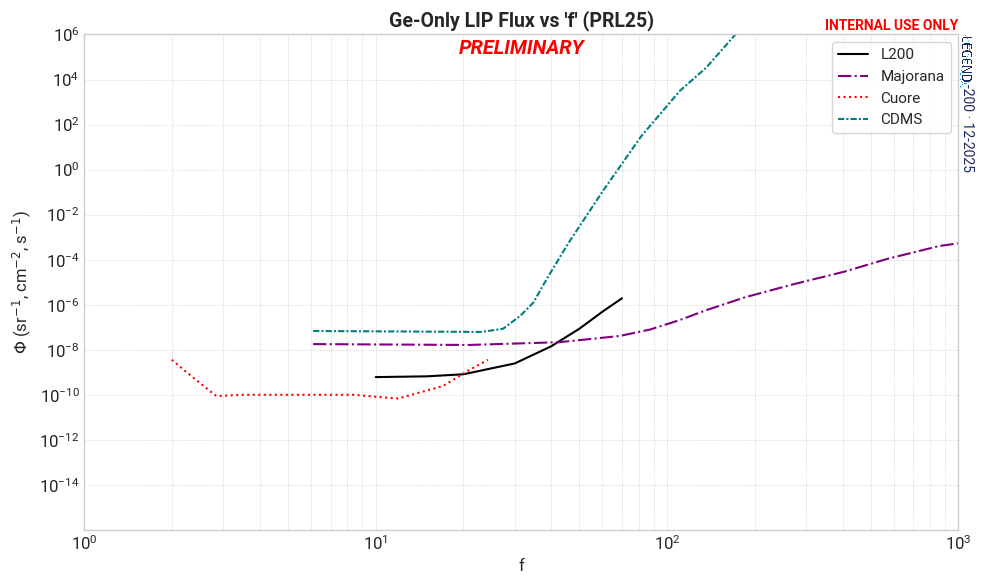

In [17]:
import matplotlib.pyplot as plt
import numpy as np

f = [10, 15, 20, 30, 40, 50, 60, 70]
sensitivity = [sensitivity_10_40, sensitivity_15_40, sensitivity_20_40,
               sensitivity_30_40, sensitivity_40_40, sensitivity_50_40,
               sensitivity_60_40, sensitivity_70_40]

plt.style.use(legendstyles.LEGEND)

# Figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Main plot lines
ax.plot(f, sensitivity, linestyle='-', color='black', label="L200")
ax.plot(Majorana_f, Majorana_s, linestyle='-.', color='purple', label="Majorana")
ax.plot(Cuore_f, Cuore_s, linestyle=':', color='red', label="Cuore")
ax.plot(CDMS_f, CDMS_s, linestyle=(0, (3, 1, 1, 1)), color="#008080", label="CDMS")

# Axes scaling and limits
ax.set_xscale("log")
ax.set_xlim(1, 1000)
ax.set_yscale("log")
ax.set_ylim(1e-16, 1e6)

ax.set_yticks([1e-14, 1e-12, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e0, 1e2, 1e4, 1e6])

ax.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)

# Proper axis labels and title
ax.set_xlabel("f", fontsize=12)
ax.set_ylabel(r"$\Phi$ (sr$^{-1}$, cm$^{-2}$, s$^{-1}$)", fontsize=12)
ax.set_title("Ge-Only LIP Flux vs 'f' (PRL25)", fontsize=14, weight='bold')

# Legend and watermark
ax.legend(frameon=True, loc='best', fontsize=11)
legendstyles.legend_watermark(ax, logo_suffix="-200")
legendstyles.add_preliminary(ax, color="red")

plt.tight_layout()

plt.savefig("prl_sensititvity.png", dpi=300, bbox_inches="tight")
plt.show()


In [18]:
print(sensitivity)

[6.092923674386209e-10, 6.591828592797608e-10, 8.141390498503202e-10, 2.4622677937632225e-09, 1.414628738586174e-08, 8.571903513625676e-08, 4.90483215456686e-07, 1.9165359167837173e-06]
